<a href="https://colab.research.google.com/github/helloghostt/modu/blob/main/20240123_day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 데이터 import

In [26]:
from sklearn.datasets import fetch_openml

# fetch_openml을 사용하여 타이타닉 데이터셋을 불러옵니다.
titanic = fetch_openml('titanic', version=1, as_frame=True)

# 데이터 프레임으로 변환
titanic_data = titanic.frame

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [27]:
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


#2. 데이터확인

In [28]:
# 데이터의 처음 5행을 출력하여 데이터를 살펴봅니다.
print(titanic_data.head())

# 데이터셋의 통계적 요약을 출력합니다.
print(titanic_data.describe())

# 결측치가 있는지 확인합니다.
print(titanic_data.isnull().sum())

   pclass survived                                             name     sex  \
0     1.0        1                    Allen, Miss. Elisabeth Walton  female   
1     1.0        1                   Allison, Master. Hudson Trevor    male   
2     1.0        0                     Allison, Miss. Helen Loraine  female   
3     1.0        0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S     2   None   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  
0                     St 

#3. 데이터 전처리

In [29]:
import pandas as pd

# 예시: 나이 결측치 처리, 성별 인코딩, 불필요한 특성 제거

# 1. 250개가 결측치 -> 만약에 이 데이터를 다 제거했을경우 1300개 20% 데이터 손실! -> 모델성능도 떨어질수 있다.
# 2. 250개를 살렸을때 -> 값을 모르는 상태 대체했을때 -> 1300개 다 쓸수있으니까 데이터는 확보 -> 신빙성이 떨어질수 있다.
    # -> 준지도학습 다른 데이터에 기반해서 추정!

#추가 : 새로운 변수는 없을까?

titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)  # 나이 결측치 처리,mean in age's null, 반영하기
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
titanic_data = titanic_data.drop(['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [6]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   survived  1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1308 non-null   float64 
dtypes: category(2), float64(5)
memory usage: 54.1 KB
None


In [31]:
titanic_data['fare'].fillna(titanic_data['fare'].mean(), inplace=True)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   survived  1309 non-null   category
 2   sex       1309 non-null   category
 3   age       1309 non-null   float64 
 4   sibsp     1309 non-null   float64 
 5   parch     1309 non-null   float64 
 6   fare      1309 non-null   float64 
dtypes: category(2), float64(5)
memory usage: 54.1 KB
None


#4. 데이터 분할

In [33]:
from sklearn.model_selection import train_test_split

# 입력 변수와 타겟 변수 분리
X = titanic_data.drop(['survived'], axis=1) # 'survived' 컬럼 제외
y = titanic_data['survived'] # 타겟 변수

# 데이터 분할: 훈련 세트 80%, 테스트 세트 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,pclass,sex,age,sibsp,parch,fare
1148,3.0,0,35.000000,0.0,0.0,7.1250
1049,3.0,0,20.000000,1.0,1.0,15.7417
982,3.0,0,29.881135,0.0,0.0,7.8958
808,3.0,0,29.881135,0.0,0.0,8.0500
1195,3.0,0,29.881135,0.0,0.0,7.7500
...,...,...,...,...,...,...
572,2.0,1,28.000000,0.0,0.0,12.6500
140,1.0,0,23.000000,0.0,1.0,63.3583
1182,3.0,1,21.000000,0.0,0.0,7.6500
312,1.0,0,50.000000,1.0,1.0,211.5000


# 5. 알고리즘 선택 -베이스라인 모델

In [34]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류기 인스턴스 생성
model = RandomForestClassifier(random_state=42)

# 6. 학습

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#7. 예측

In [36]:
# 테스트 데이터를 가지고 predict(예측)한다.
predictions = model.predict(X_test)
predictions

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1',
       '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0',
       '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1

#8. 평가

```
실제값과 예측된값이 실제로 일치하는지를 점검! -> 정확도
생존여부(1/0) -> 분류 -> 이진 분류 -> 맞는지 틀리는지 정확도!
```



In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions) #실제값과 예측값 비교
print(f"Accuracy: {accuracy}") #두 데이터가 얼마나 일치하는지 점검

Accuracy: 0.7862595419847328


In [ ]:
# 두가지 방법
# 1. EDA로 다시 돌아가서 처음부터 진행! -> 78% 마음에 안들어 -> 90%(자의적, 타의적)! # 10번
# 2. 나는 이 성능에 만족하니까 하이퍼파라미터 튜닝! # 맨 마지막!

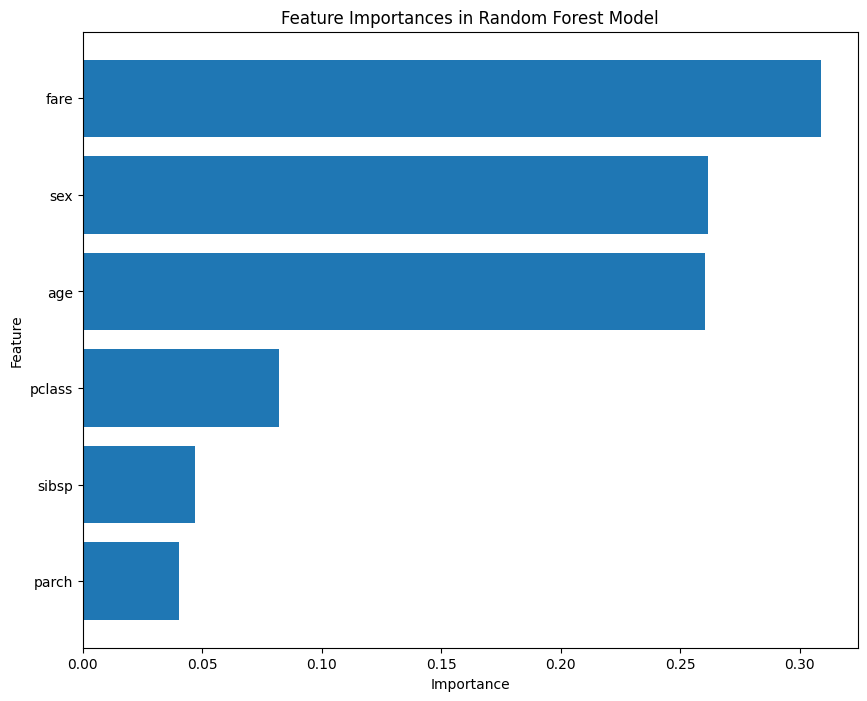

In [24]:
import matplotlib.pyplot as plt

# 변수 중요도 추출
feature_importances = model.feature_importances_

# 변수 이름과 중요도를 매핑
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# 중요도에 따라 변수 정렬
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh([item[0] for item in sorted_importance], [item[1] for item in sorted_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis() # 높은 중요도가 위로 오게 정렬
plt.show()

#9. 튜닝


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [39]:
# 테스트 데이터를 가지고 predict(예측)한다.
predictions_grid = grid_search.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_grid) #실제값과 예측값을 비교해줘
print(f"Accuracy: {accuracy}") # 두 데이터가 얼마나 일치하는지 점검

Accuracy: 0.7748091603053435


#California housing train set

In [1]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [2]:
print(dataset)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df=dataset

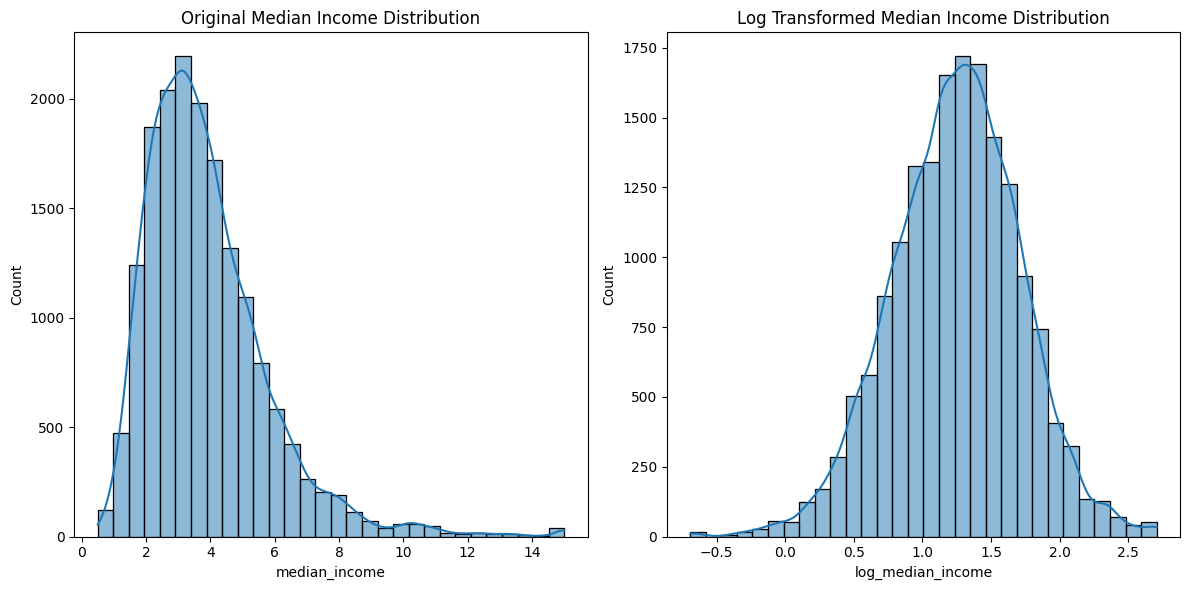

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 로그 변환 수행
df['log_median_income'] = np.log(df['median_income'])

# 원래 데이터와 로그 변환된 데이터의 분포 비교를 위한 시각화
plt.figure(figsize=(12, 6))

# 원래 데이터의 분포 (median_income)
plt.subplot(1, 2, 1)
sns.histplot(df['median_income'], kde=True, bins=30)
plt.title('Original Median Income Distribution')

# 로그 변환된 데이터의 분포 (log_median_income)
plt.subplot(1, 2, 2)
sns.histplot(df['log_median_income'], kde=True, bins=30)
plt.title('Log Transformed Median Income Distribution')

plt.tight_layout()
plt.show()

In [9]:
df[['median_income', 'log_median_income']].head()

,median_income,log_median_income
0,1.4936,0.401189
1,1.8200,0.598837
2,1.6509,0.501321
3,3.1917,1.160554
4,1.9250,0.654926


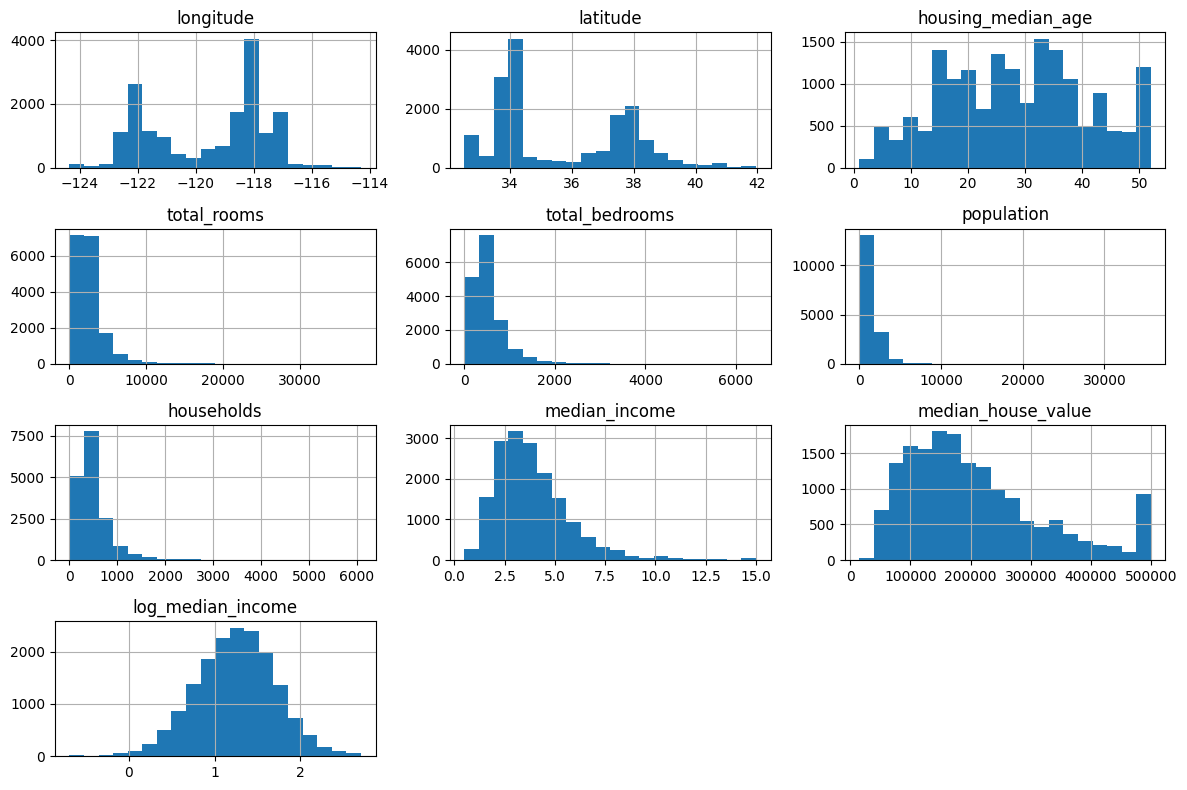

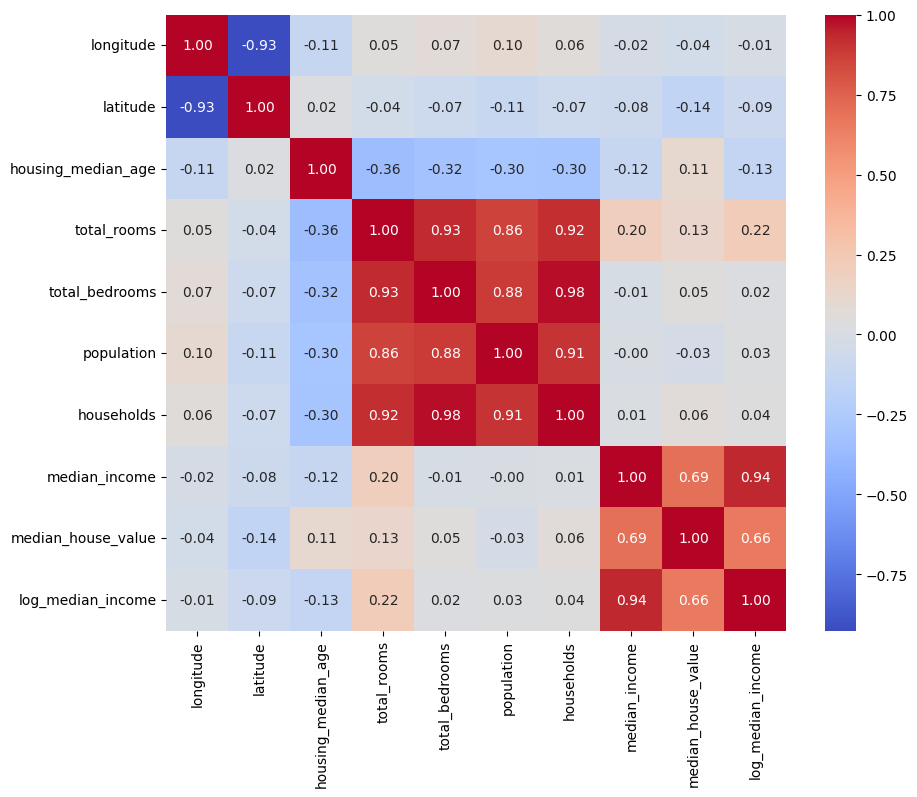

In [10]:
# 데이터 분포 확인을 위한 히스토그램
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 상관 관계 분석을 위한 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 로지스틱 회귀

- -----target
- Personal Loan  ( 0 or 1 의 값을 갖는 변수이다. )
- -----feature
- Experience 경력
- Income 수입
- Famliy 가족단위
- CCAvg 월 카드사용량
- Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
- Mortgage 가계대출
- Securities account 유가증권계좌유무
- CD account 양도예금증서 계좌 유무
- Online 온라인계좌유무
- CreidtCard 신용카드유무

In [12]:
# 필요한 Library
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time

# Personal Loan 데이터 불러오기

ploan = pd.read_csv("/content/sample_data/Personal_Loan.csv")
ploan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


상수항의 중요성

* 절편(b0) 역할: 상수항 b0은 모델의 절편을 나타냅니다. 이는 예측 변수들의 값이 모두 0일 때의 로그 오즈(log-odds)를 나타냅니다. 즉, 다른 변수들의 영향을 받지 않았을 때의 기본적인 사건 발생 확률을 반영합니다.
* 데이터 오프셋 조정: 상수항을 추가함으로써 모델은 데이터의 기본 수준이나 오프셋(offset)을 조정할 수 있습니다. 이를 통해 모델은 변수들의 관계를 더 정확하게 학습할 수 있습니다.

In [13]:
# 사용하지 않을 변수 제거 ID, zip code
ploan_processed = ploan.dropna().drop(["ID","ZIP Code"], axis=1, inplace = False)

# 상수항 추가 (회귀모델에서 b0를 위한 상수항)
ploan_processed = sm.add_constant(ploan_processed, has_constant="add")
# sm.add_constant: statsmodels 라이브러리의 함수로, 데이터셋에 상수항을 추가합니다.
# has_constant="add": 데이터셋에 상수항이 이미 존재하지 않는 경우에만 추가하라는 의미입니다.


# 데이터 확인
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


In [14]:
# 대출여부는 1 or 0으로 결정된다. 즉 target이 1/0의 값을 갖기에
# 로지스틱 회귀모형이 적합하다.

# 여기서 사용된 ploan_processed.columns.difference(["Personal Loan"])는 pandas 라이브러리의 DataFrame에서
# 특정 컬럼을 제외한 나머지 컬럼들을 선택하는 데 사용됩니다.
feature_columns = ploan_processed.columns.difference(["Personal Loan"])
X = ploan_processed[feature_columns]
y = ploan_processed["Personal Loan"]
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [15]:
# 로지스틱 모형 적합

model = sm.Logit(train_y, train_x)
results = model.fit()    # 다변수함수에 뉴턴방법을 적용한 로지스틱 회귀모형

Optimization terminated successfully.
         Current function value: 0.135959
         Iterations 9


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.5881
Time:                        06:34:27   Log-Likelihood:                -237.93
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                1.397e-138
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0016      0.101     -0.016      0.987      -0.200       0.196
CCAvg                  0.0954      0.063      1.526      0.127      -0.027       0.218
CD Account             4.3674      0.531      8.226      0.000       3.327       5.408
CreditCard            -1.3552      0.349     -3.881      0.000      -2.040      -0.671
Education              1.4684      0.180      8.162      0.000       1.116       1.821
Experience             0.0165      0.101      0.163      0.870      -0.181       0.214
Family                 0.7160      0.125      5.734      0.000       0.471       0.961
Income                 0.0499      0.004     12.500      0.000       0.042       0.058
Mortgage               0.0006      0.001      0.634      0.526      -0.001       0.002
Online                -0.4918      0.262     -1.880      0.060      -1.005       0.021
Securities Account    -1.4553      0.484     -3.007      0.003      -2.404      -0.507
const                -12.5215      2.730     -4.586      0.000     -17.873      -7.170
======================================================================================
"""

In [17]:
# Age와 CCAVG와 Experience가 유의하지 않음
# 오즈는 어떤 사건이 발생할 확률/발생하지 않을 확률의 비율
# 오즈비  그룹 1의 오즈/그룹 2의 오즈

#오즈비
results.params

Age                   -0.001631
CCAvg                  0.095392
CD Account             4.367360
CreditCard            -1.355179
Education              1.468420
Experience             0.016455
Family                 0.715961
Income                 0.049919
Mortgage               0.000596
Online                -0.491809
Securities Account    -1.455320
const                -12.521527
dtype: float64

In [18]:
# 오즈비 계산 및 해석
np.exp(results.params)

Age                    0.998370
CCAvg                  1.100090
CD Account            78.835214
CreditCard             0.257901
Education              4.342370
Experience             1.016592
Family                 2.046153
Income                 1.051186
Mortgage               1.000596
Online                 0.611519
Securities Account     0.233326
const                  0.000004
dtype: float64

* Age (나이): 오즈비는 약 0.998로, 나이가 한 살 증가할 때마다 대출 승인 확률이 약간 감소합니다.
* CCAvg (월별 신용카드 사용량): 오즈비는 약 1.1로, 월별 신용카드 사용량이 증가하면 대출 승인 확률이 증가합니다.
* CD Account (CD 계좌 보유 여부): 오즈비는 약 78.84로, CD 계좌를 보유하고 있으면 대출 승인 확률이 크게 증가합니다.
* CreditCard (신용카드 보유 여부): 오즈비는 약 0.258로, 신용카드를 보유하고 있지 않은 경우 대출 승인 확률이 증가합니다.
* Education (교육 수준): 오즈비는 약 4.34로, 교육 수준이 높을수록 대출 승인 확률이 증가합니다.
* Experience (경험): 오즈비는 약 1.017로, 경험이 많을수록 대출 승인 확률이 약간 증가합니다.
* Family (가족 구성원 수): 오즈비는 약 2.05로, 가족 구성원이 많을수록 대출 승인 확률이 증가합니다.
* Income (소득): 오즈비는 약 1.05로, 소득이 높을수록 대출 승인 확률이 증가합니다.
* Mortgage (주택 담보 대출 금액): 오즈비는 약 1.0006로, 주택 담보 대출 금액이 증가하면 대출 승인 확률이 약간 증가합니다.
* Online (온라인 뱅킹 사용 여부): 오즈비는 약 0.612로, 온라인 뱅킹을 사용하지 않는 경우 대출 승인 확률이 감소합니다.
* Securities Account (증권 계좌 보유 여부): 오즈비는 약 0.233으로, 증권 계좌를 보유하고 있지 않은 경우 대출 승인 확률이 증가합니다.

In [19]:
pred_y = results.predict(test_x)
pred_y

1816    0.005733
1195    0.102950
2085    0.005262
406     0.025856
303     0.926229
          ...   
1676    0.184499
680     0.000842
233     0.005965
2373    0.829847
2088    0.003645
Length: 750, dtype: float64

* cut_off 함수는 두 개의 매개변수를 받습니다: y는 모델에 의해 예측된 확률 값의 배열, threshold는 이진 분류를 결정하는 임계값입니다.
* 함수 내에서 y.copy()를 통해 입력된 확률 값의 배열을 복사하여 원본 데이터에 영향을 주지 않도록 합니다.
* 임계값보다 큰 확률 값을 가진 요소들은 1로 설정하고, 그렇지 않은 값들은 0으로 설정합니다.
* 최종적으로 0과 1로 구성된 이진 결과를 반환합니다.

In [20]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)

# 여기서 pred_y는 로지스틱 회귀 모델을 통해 예측된 확률 값입니다.
# cut_off 함수를 사용하여 임계값 0.5를 적용합니다. 이는 일반적인 이진 분류에서 사용되는 기본 임계값입니다.
# 결과적으로 pred_Y는 각 관측치가 클래스 1(예: 대출 승인)에 속할 것으로 예측되면 1, 그렇지 않으면 0을 가지게 됩니다.
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1816    0
1195    0
2085    0
406     0
303     1
       ..
1676    0
680     0
233     0
2373    1
2088    0
Length: 750, dtype: int64

In [21]:
# confusion matrix (분류 표를 나타낸 행렬)
# 0을 0으로 예측할 확률과 1을 1로 예측할 확률

cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

[[667   6]
 [ 29  48]]


In [22]:
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
  return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

acc(cfmat)

0.9533333333333334

In [ ]:
#95프로의 정확도를 가진다
#100개중 99개가0이고 1개가 1인것이 더 정확한가? 그건 아니다 위의 설명들 참고..

In [23]:
# 임계값 0~1에 따른 정확도 확인
# 임계값에 따라서 정확도가 달라질수 있기 때문에 다음과 같은 함수를 잘 사용해야함

#threshold = np.arange(0, 1, 0.1): 0부터 1 사이에서 0.1 간격으로 임계값을 생성합니다.
threshold = np.arange(0,1,0.1)
#table = pd.DataFrame(columns=['ACC']): 정확도를 저장할 DataFrame을 생성합니다.
#여기서 'ACC'는 정확도를 나타내는 열입니다.
table = pd.DataFrame(columns = ['ACC'])

for i in threshold :
  #cut_off 함수를 사용하여 임계값 i를 적용한 예측 결과를 얻습니다.
	pred_Y = cut_off(pred_y,i)
	#혼동 행렬(confusion matrix)를 계산합니다.
	cfmat = confusion_matrix(test_y,pred_Y)
	#정의된 acc 함수를 사용하여 혼동 행렬을 기반으로 정확도를 계산하고, 이를 테이블에 저장합니다.
	table.loc[i] = acc(cfmat)

table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.900000
0.2,0.937333
0.3,0.946667
0.4,0.953333
0.5,0.953333
0.6,0.950667
0.7,0.949333
0.8,0.942667


* 임계값 0.0: 모든 케이스를 긍정(대출 승인)으로 예측합니다. 여기서 정확도는 매우 낮습니다(약 10.27%).
* 임계값 0.1 ~ 0.9: 임계값이 증가함에 따라 정확도가 변화합니다. 이 범위에서 정확도는 상대적으로 높으며, 특히 0.3에서 0.6 사이의 임계값에서 가장 높은 정확도를 보입니다.
* 임계값 1.0: 모든 케이스를 부정(대출 거절)으로 예측합니다. 여기서는 정확도가 다시 낮아집니다.

* 형 잡힌 임계값 선택: 임계값이 너무 낮거나 높으면 모델이 한쪽 클래스에 치우쳐 예측할 수 있습니다. 이는 불균형한 예측으로 이어져 실제 상황에서의 의사결정에 부적합할 수 있습니다.
* 비즈니스 문맥 고려: 임계값 설정은 비즈니스 문맥과 목표를 고려하여 결정해야 합니다. 예를 들어, 대출 승인에서 리스크를 최소화하려면 보수적인 임계값을, 승인율을 높이려면 덜 보수적인 임계값을 사용할 수 있습니다.
* 성능 지표 고려: 정확도 외에도 다른 성능 지표(예: 정밀도, 재현율, F1 스코어)를 고려하여 임계값을 설정하는 것이 중요합니다. 특히 불균형한 데이터셋의 경우, 정확도만으로는 모델의 성능을 충분히 평가하기 어려울 수 있습니다.

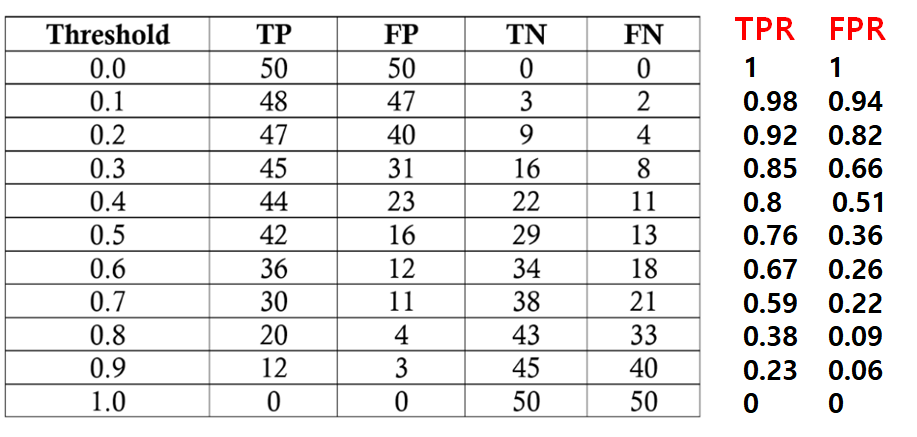

# TPR = TR / All positive
# FPR = FP / All negative
# 정리하자면, TPR은 1에 가까울 수록 좋고, FPR은 0에 가까울 수록 좋습니다.

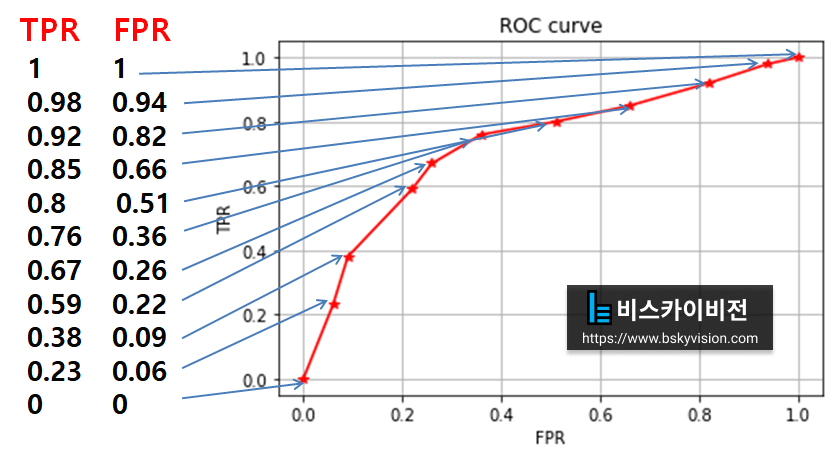

AUC: 0.9520271704521333


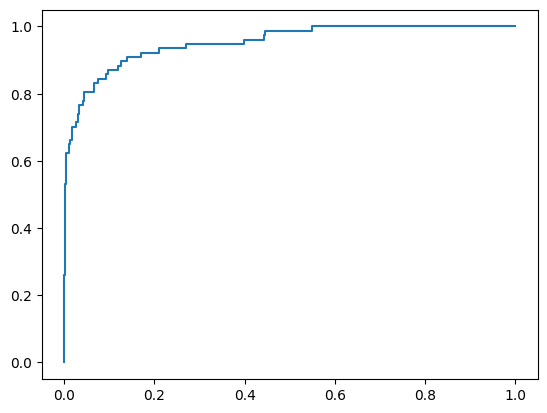

In [24]:
# 로지스틱 회귀분석의 성능은 AUC로 측정하는 경우가 많습니다.
# decision threshold가 커지면 TPR이든 FPR이든 작아질 수 밖에 없습니다.
# 양성(0 또는 1로)으로 예측되는 경우가 적어지기 때문입니다.
# 따라서 FPR의 값이 작아질 때 TPR이 천천히 작아진다면,
# 좋은 성능을 가진 이진분류기라고 볼 수 있습니다.

# 왜냐하면 우리는 안좋은 것/ 잘일어나지 않는 것을 잘 맞추는 것에 관심이 있기 때문입니다.

# AUC는 ROC curve의 곡선 아래 영역을 나타내며 classification 성능평가지표로 많이 사용된다.
# 1에 가까울수록 성능이 우수하다고 판단하며
# 0.5인 경우에 최악의 성능이다. (이는 model이 classification 능력이 없음을 의미한다.)
# 만약 AUC값이 0.5 미만이라면 Labeling 혹은 Algorithm이 잘못됐을 가능성이 크다.
# 왠만하면 AUC는 0.6이하면 보통 모델의 성능이 낮다고 표현하며,
# 0.8이상이면 최상이라고 표현합니다.


# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(test_y,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

In [25]:
# 오즈비 계산
odds_ratios = np.exp(results.params)

# 점수 할당 (오즈비의 10배를 점수로 사용)
scores = odds_ratios * 1

# np.exp(results.params)를 통해 로지스틱 회귀 모델의 계수를 지수화하여 오즈비를 계산합니다.
# 오즈비에 1을 곱하여 각 변수에 대한 점수를 할당합니다. 이는 각 변수의 영향력을 점수로 변환하는 방식입니다.

# 고객별 점수 계산 함수 정의
def calculate_score(row, scores):
    score = 0
    for feature in scores.index:
        score += row[feature] * scores[feature]
    return score

# calculate_score 함수는 DataFrame의 각 행(고객 데이터)과 점수를 입력받아, 각 변수에 대한 점수를 합산하여 총점을 계산합니다.
# 함수는 각 변수의 값을 해당 변수의 점수와 곱하고, 이를 모두 더하여 총점을 반환합니다.

# 테스트 데이터에 대한 점수 계산
test_scores = test_x.apply(lambda row: calculate_score(row, scores), axis=1)

#test_x.apply(...)는 테스트 데이터셋의 각 행(고객)에 대해 calculate_score 함수를 적용합니다.
#각 고객별로 계산된 총점을 test_scores에 저장합니다.
#test_scores.head()를 통해 계산된 점수의 상위 몇 개 결과를 출력합니다.

# 결과 출력
test_scores.head()

1816    175.391898
1195    184.938728
2085    254.784579
406     204.668927
303     912.511133
dtype: float64